<a href="https://colab.research.google.com/github/rimzbravz/2019ChurnPrediction/blob/master/Telecom_Customer_Churn_RB_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.





In [0]:
### Use Google Colla because Kaggle Kernels are restarting every now and then

## Import Dataset to the Environment:

#from google.colab import files
#files.upload()


In [1]:
# Explore mounting later, I want to mount a specific folder if that is possible:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
### Get working Directory:

import os
os.getcwd()



'/content'

**Data from IBM Sample Datasets**

Each row represents a customer, each column contains customer's attributes described on the column metadata

# **What Contributes to Churn?**

Hypothesis:
- Customers will naturally churn due to low quality service
- Customers will also churn if they no longer need or can support the amount

Client Related Hypotheses:
- Clients younger than 30 years old are more likely to churn
- Clients with customer complaits are more likely to churn
- Clients with DSL internet are more likely to churn
- Clients with multiple subscriptions are less likely to churn
- Clients with Large total Paymensts are less likely to churn
- Clients without internet service are less likely to churn
- Clients with dependents are less likely to churn
- Clients with longer tenure are less likely to churn


Plan Related Hypotheses:
- Clients with Monthly Plans are most likely to churn
- Clients Plans that are paid via automatic means are less likely to churn
- Clients that uses paperless billing are less likely to churn


# **1. Data Exploration**
- Univariate Analysis
We exlore the dataset and identify missing values. We check for the data and analyze distributions where applicable.

In [4]:
from os import walk
for (dirpath, dirnames, filenames) in walk("../content/drive/My Drive/Dataset_Upload"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)


Directory path:  ../content/drive/My Drive/Dataset_Upload
Folder name:  []
File name:  ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [5]:
## Read the data set:
import pandas as pd
ChurnData = pd.read_csv(r'../content/drive/My Drive/Dataset_Upload/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Explore the data
ChurnData.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [7]:
# Basic EDA
print("Data Shape: ", ChurnData.shape)
print("\n Describe: \n", ChurnData.describe())
print("\n Features: \n", ChurnData.columns)


print("\n Missing Values: ", ChurnData.isnull().sum().values.sum())



print("\n Data Types: \n",ChurnData.dtypes)
print("\n Unique: \n", ChurnData.nunique())





Data Shape:  (7043, 21)

 Describe: 
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

 Features: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 Missing Values:  0

 Data Types: 
 customerID           object
gender               object
SeniorCitizen         in

In [6]:
## Install Pandas Profiling Library:

#!pip install pandas_profiling

Next we try to use Pandas Profiling for EDA

In [0]:
ChurnData.head()


In [11]:
import pandas_profiling

pandas_profiling.ProfileReport(ChurnData)

## Notice Interesting insights from EDA:

* Total charges looks like a continuous number but it only has 6531 distinct values compared to dataset size of 7043. Let's check if there is some 'missing' values in this column

* Some Variables have categories: {Yes, No, No Internet Service}. Internet Service might be a confounding variable. Do we need to recode 'No Internet Service' as 'No' ?


# **2. Data Cleaning / Transformation**

In [12]:
# Check the Total Charges Column:

ChurnData[ChurnData['TotalCharges'].isnull()]
ChurnData[ChurnData['TotalCharges']== " "]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

We figured out that there are " " whitespace in this field. 
it covers 11 / 7043 = .15% of the dataset 
we need to treat this - in this case, since it is a very little fraction, we can exclude them 

In [13]:
# Code to Exclude Those with " " Total Charges from the dataset:
ChurnData = ChurnData[ChurnData['TotalCharges'] != " "]
ChurnData.shape

(7032, 21)

Notice that the dataset size has been reduced. Next we transform the variables into the correct dtypes. Notice that the the TotalCharges column is an object when it looks like a decimal number:

In [14]:
# Run the Pandas profiling again:
#ChurnData.profile_report()
ChurnData['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

Total Charges is stil Categorical. Let's transform it into a numeric data type:

In [0]:
ChurnData['TotalCharges'] = ChurnData['TotalCharges'].astype(float)

In [16]:
# CHeck that now it is a float:
ChurnData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Based on the Pandas Profiling We noticed there are Columns with Categories as 'No internet/Phone service'.

In the dataset docs it says whether a customer has tech support or Not with 'Yes', 'No', 'No Internet Service'. It is probably saying that it has no Tech Support because it has no Internet service.

Note that we already have an identifier for Phone Service and Internet Service so we can Recode 'No Internet Service' as 'No', same goes with 'No Phone Service'

These fields needs to be recoded:


In [0]:
# Recode the Values in columns:
cols_to_trans = ['MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [18]:
print(ChurnData.OnlineSecurity.unique())
print(ChurnData.MultipleLines.unique())


['No' 'Yes' 'No internet service']
['No phone service' 'No' 'Yes']


In [0]:
# Let's define a function that will recode a column in a dataframe. Remember that a dataframe column is essentially a series
def recode_No(input_series):
    if input_series in ['No internet service','No phone service']:
        return 'No'
    else:
        return input_series

In [20]:
ChurnData['OnlineSecurity'] = ChurnData['OnlineSecurity'].apply(recode_No)
ChurnData['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In the previous code, we defined a function that will recode the values of some columns to 'No'. Let's apply that to all columns that needs that transformation:



In [21]:
for cols in cols_to_trans:
    ChurnData[cols] = ChurnData[cols].apply(recode_No)
    print(cols, ' : ', ChurnData[cols].unique() )

MultipleLines  :  ['No' 'Yes']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']


Now that we cleaned the dataset, let's visualize the data to gain more insights:

# 3. Data Visualization

In [0]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

No     5163
Yes    1869
Name: Churn, dtype: int64
Churn Rate:  26.578498293515356


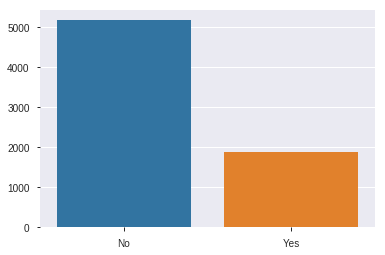

In [23]:
#ChurnData.columns

y = ChurnData['Churn'].value_counts()
print(y)
sns.barplot(y.index, y.values)

print('Churn Rate: ', ChurnData[ChurnData['Churn'] == 'Yes'].shape[0]/ChurnData.shape[0]*100 )

Notice that we have a somewhat unbalanced data i.e the event rate is much lower. We might consider SMOTE / ROSE algorithms later.

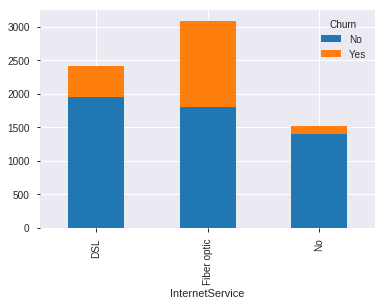

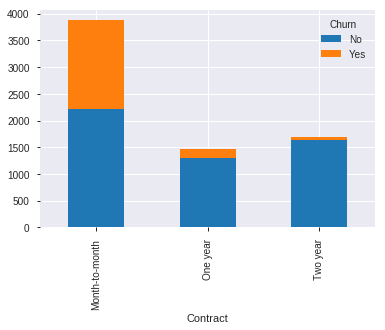

In [24]:
ChurnData.groupby(['InternetService','Churn']).size().unstack().plot(kind = 'bar', stacked = True)
ChurnData.groupby(['Contract','Churn']).size().unstack().plot(kind = 'bar', stacked = True)

We can use the above visualizations for exploring possible variables that greatly affects the Churn Rate

# 4. Model Building
In this section, we fit models to our dataset to predict Customer churn. Our goal is to derive:
* rules
* Variable Importance
* Predictions

In [25]:
ChurnData.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [0]:
## Load Libraries:

#from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from IPython.display import Image
#from sklearn import neighbors
#from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

### Data Preparation for modelling
* Transform variables into required format (Our data is mostly Categorical)


In [27]:
ADS = ChurnData.copy()
# Drop customerID
ADS = ADS.drop(['customerID'], axis = 1) #axis = 1 because it is a column
ADS.head()

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0  Female              0     Yes  ...          29.85         29.85    No
1    Male              0      No  ...          56.95       1889.50    No
2    Male              0      No  ...          53.85        108.15   Yes
3    Male              0      No  ...          42.30       1840.75    No
4  Female              0      No  ...          70.70        151.65   Yes

[5 rows x 20 columns]

Preprocess the data to handle categorical values:

In [28]:
# 
label_encoder = preprocessing.LabelEncoder()

ADS.head()

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0  Female              0     Yes  ...          29.85         29.85    No
1    Male              0      No  ...          56.95       1889.50    No
2    Male              0      No  ...          53.85        108.15   Yes
3    Male              0      No  ...          42.30       1840.75    No
4  Female              0      No  ...          70.70        151.65   Yes

[5 rows x 20 columns]

In [29]:
#ADS.gender.dtype
encode_cols = ADS.columns.drop(['tenure','MonthlyCharges', 'TotalCharges'])
encode_cols

# Research more on list comrehensions and datatype object, might need to use numpy classes here:
#encode_cols = [for i in ADS.columns if DS.columns.dtype != 'int64']

#ADS['gender'] = label_encoder.fit_transform(ADS['gender'])

for cols in encode_cols:
    ADS[cols] = label_encoder.fit_transform(ADS[cols])
    print(cols," : ",ADS[cols].dtype)


gender  :  int64
SeniorCitizen  :  int64
Partner  :  int64
Dependents  :  int64
PhoneService  :  int64
MultipleLines  :  int64
InternetService  :  int64
OnlineSecurity  :  int64
OnlineBackup  :  int64
DeviceProtection  :  int64
TechSupport  :  int64
StreamingTV  :  int64
StreamingMovies  :  int64
Contract  :  int64
PaperlessBilling  :  int64
PaymentMethod  :  int64
Churn  :  int64


In [30]:
#ADS.dtypes
ADS.head()

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
2       1              0        0  ...           53.85        108.15      1
3       1              0        0  ...           42.30       1840.75      0
4       0              0        0  ...           70.70        151.65      1

[5 rows x 20 columns]

### Partition the dataset into Features and Target Variable as well as train and test splits

In [31]:
from sklearn.model_selection import train_test_split

print(ADS.columns)

X = ADS.drop(['Churn'], axis = 1)
y = ADS.Churn

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(7032, 19)
(7032,)
X_train :  (5625, 19)
X_test :  (1407, 19)
y_train :  (5625,)
y_test :  (1407,)


### We will now begin training models:

* Decision Tree Baseline Model:

In [0]:
#Classifier = clf

# Create Classifer Object
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf = clf.fit(X_train,y_train) # fit(Features, Labels)

# Predict Response for the test Dataset
y_pred = clf.predict(X_test)


In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Let's evaluate the model:

In [34]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1013
           1       0.50      0.51      0.51       394

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.72      0.72      0.72      1407

0.7199715707178393


Print the Confusion Matrix:


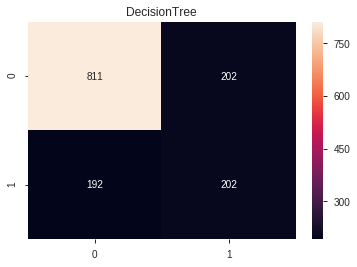

In [35]:
DecisionTree_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(DecisionTree_conf_matrix, annot=True,  fmt='');
title = 'DecisionTree'
plt.title(title);

Visualize the Tree:

In [36]:
print(clf) 

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file='tree.dot'
                                #, 
                                #feature_names=X.columns,  
                                #class_names=y.columns
                               )

# Draw graph
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Now we want to try Different Models and Print Variable Importance:
* Decision Tree
* CHAID
* Random Forest
* XGBoost

In [37]:
# Create Classifer Objects

clf_RF = sklearn.ensemble.RandomForestClassifier()
#clf_CHAID = tree.DecisionTreeClassifier()
#clf_XGB = tree.DecisionTreeClassifier()


# Train the classifier
clf_RF = clf_RF.fit(X_train,y_train) # fit(Features, Labels)

# Predict Response for the test Dataset
y_pred_RF = clf_RF.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
print(classification_report(y_test, y_pred_RF))
print(accuracy_score(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1013
           1       0.60      0.46      0.52       394

    accuracy                           0.76      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407

0.7640369580668088


Using tha Base Random Forest Classifier increased the Accuracy to 76%. Let's try to view the Variable Importance from Random Forest.

In [39]:
importances = clf_RF.feature_importances_
print(importances)
indices = np.argsort(importances) #get the index, Sort by importances Value
print(indices)

[0.02665599 0.02269853 0.02187324 0.01934406 0.14777308 0.00771197
 0.01747388 0.05254273 0.02121901 0.02261217 0.01809606 0.02804974
 0.0162583  0.01854368 0.07631305 0.02468738 0.050932   0.19930955
 0.20790558]
[ 5 12  6 10 13  3  8  2  9  1 15  0 11 16  7 14  4 17 18]


Text(0.5, 0, 'Relative Importance')

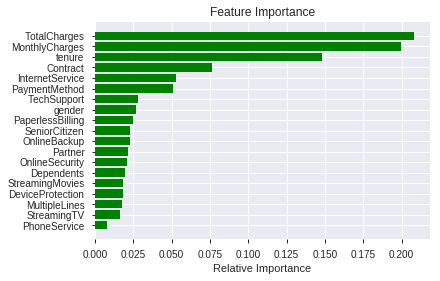

In [40]:
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'g', align = 'center')
plt.yticks(range(len(indices)),X_train.columns[indices])
plt.xlabel("Relative Importance")


It seemed that MonthlyCHarges has the largest Relative Importance: Let's try to visualize the distribution of Monthly Charges:

In [41]:
ADS.columns
ADS.dtypes
ADS.head()

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
2       1              0        0  ...           53.85        108.15      1
3       1              0        0  ...           42.30       1840.75      0
4       0              0        0  ...           70.70        151.65      1

[5 rows x 20 columns]

In [0]:
target_0 = ADS[ADS['Churn'] == 0]
target_1 = ADS[ADS['Churn'] == 1]



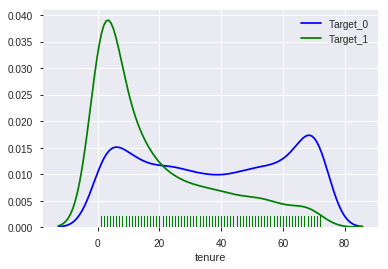

In [48]:
sns.distplot( target_0["tenure"] , rug = True, hist = False, color="blue", label="Target_0")
sns.distplot( target_1["tenure"] , rug = True, hist = False, color="green", label="Target_1")

#sns.plt.legend()

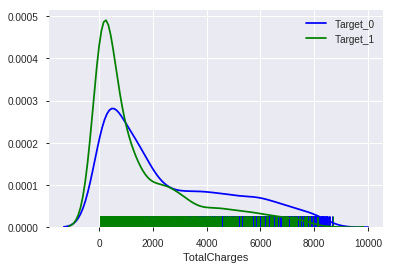

In [49]:

sns.distplot( target_0['TotalCharges'] , rug = True, hist = False, color="blue", label="Target_0")
sns.distplot( target_1['TotalCharges'] , rug = True, hist = False, color="green", label="Target_1")


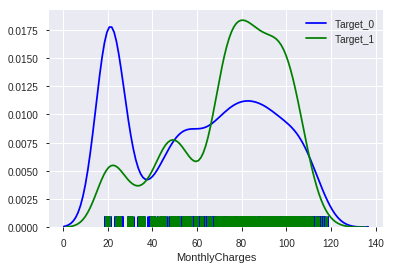

In [50]:

sns.distplot( target_0['MonthlyCharges'] , rug = True, hist = False, color="blue", label="Target_0")
sns.distplot( target_1['MonthlyCharges'] , rug = True, hist = False, color="green", label="Target_1")



In [51]:
target_0.head()

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
3       1              0        0  ...           42.30       1840.75      0
6       1              0        0  ...           89.10       1949.40      0
7       0              0        0  ...           29.75        301.90      0

[5 rows x 20 columns]

at this point let's reflect and ask clarifying questions.


*   Are those not billed monthly have some value in the MonthlyCharges Variable? If yes, Does this column represent the 'annualized' Value in  a month? Test: Get Customer with Non-Monthly Billing **Result: Even though contract is 'Yearly', MonthlyCharges Reflects the Payment if Monthly.** TotalCHarges is a probably a Confounding Variable 

*   Some Variables with Greater than two Categories are Transformed Numerically. This could probably be wrong. Instead, use one-hot-encoding

*   Tenure is in Month's Unit.**Idea: Bin the Tenure and use as variable, or let it be Numeric**

*   Based on Quick Visualization in Tableau: Month-to-Month Electronic Check billing method has the highest Churn Rates

**Additional Idea:**

*   Determine Optimal Monthly Charge where Churn Rates are Lower? E.g. Point of inflection in Monthly Charges that lifts the Churn

*   Topic of another notebook: Customer Segmentation???

In [56]:
#ADS.Contract.unique()
#
ChurnData[ChurnData['Contract'] != 'Month-to-month'].head()

customerID gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
1   5575-GNVDE   Male              0  ...          56.95      1889.50     No
3   7795-CFOCW   Male              0  ...          42.30      1840.75     No
9   6388-TABGU   Male              0  ...          56.15      3487.95     No
11  7469-LKBCI   Male              0  ...          18.95       326.80     No
12  8091-TTVAX   Male              0  ...         100.35      5681.10     No

[5 rows x 21 columns]

Try XGBoost Model: Learn In Depth Later
https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/



In [0]:
from xgboost import XGBClassifier

# Create Classifer Objects

#clf_RF = sklearn.ensemble.RandomForestClassifier()
#clf_CHAID = tree.DecisionTreeClassifier()
clf_XGB = XGBClassifier()


# Train the classifier
clf_XGB = clf_XGB.fit(X_train,y_train) # fit(Features, Labels)

# Predict Response for the test Dataset
y_pred_XGB = clf_XGB.predict(X_test)

In [66]:
print(clf_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [65]:
print(classification_report(y_test, y_pred_XGB))
print(accuracy_score(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1013
           1       0.63      0.56      0.59       394

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.78      1407

0.7860696517412935
